#Regression using neural networks
* Find the `pima-diabetes.csv` file in the `./data/` folder.
* Can we predict `Age` knowing all other variables?

In [1]:
from google.colab import files
uploaded = files.upload()

Saving adult1.csv to adult1.csv


In [2]:
import pandas as pd
data = pd.read_csv('adult1.csv', delimiter=',')
data.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,country,earnings
0,39,3,77516,13,13,0,0,1,1,2174,0,40,1,0
1,50,2,83311,13,13,1,1,1,1,0,0,13,1,0
2,38,1,215646,10,9,2,0,1,1,0,0,40,1,0
3,53,1,234721,6,7,1,1,2,1,0,0,40,1,0
4,28,1,338409,13,13,1,2,2,0,0,0,40,14,0


In [3]:
import numpy as np
dataset = np.genfromtxt('adult1.csv', delimiter=",", skip_header = True) 

In [4]:
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

In [5]:
print('')
print(dataset.shape)
print('')
print(dataset[0:5])


(32561, 14)

[[ 39.0  3.0  77516.0  13.0  13.0  0.0  0.0  1.0  1.0  2174.0  0.0  40.0
   1.0  0.0]
 [ 50.0  2.0  83311.0  13.0  13.0  1.0  1.0  1.0  1.0  0.0  0.0  13.0
   1.0  0.0]
 [ 38.0  1.0  215646.0  10.0  9.0  2.0  0.0  1.0  1.0  0.0  0.0  40.0
   1.0  0.0]
 [ 53.0  1.0  234721.0  6.0  7.0  1.0  1.0  2.0  1.0  0.0  0.0  40.0  1.0
   0.0]
 [ 28.0  1.0  338409.0  13.0  13.0  1.0  2.0  2.0  0.0  0.0  0.0  40.0
   14.0  0.0]]


In [6]:
# Select age as the output (Y)
Y = dataset[:, 0] 
# All others as the input (X)
X = dataset[:, [1,2,3,4,5,6,7,8]]

In [7]:
print(Y)
print(X)

[ 39.0  50.0  38.0 ...  58.0  22.0  52.0]
[[ 3.0  77516.0  13.0 ...  0.0  1.0  1.0]
 [ 2.0  83311.0  13.0 ...  1.0  1.0  1.0]
 [ 1.0  215646.0  10.0 ...  0.0  1.0  1.0]
 ...
 [ 1.0  151910.0  10.0 ...  4.0  1.0  0.0]
 [ 1.0  201490.0  10.0 ...  3.0  1.0  1.0]
 [ 6.0  287927.0  10.0 ...  2.0  1.0  0.0]]


In [8]:
# Standardization
mean = X.mean(axis = 0)
X -= mean
std = X.std(axis = 0)
X /= std

# Rescaling
Ymax = Y.max()
Y = Y / Ymax

In [9]:
print(X.shape)
print(X[:5, :])

(32561, 8)
[[ 1.0 -1.1  1.0  1.1 -0.9 -1.1 -0.3  0.7]
 [ 0.3 -1.0  1.0  1.1 -0.1 -0.4 -0.3  0.7]
 [-0.4  0.2 -0.1 -0.4  0.7 -1.1 -0.3  0.7]
 [-0.4  0.4 -1.6 -1.2 -0.1 -0.4  1.5  0.7]
 [-0.4  1.4  1.0  1.1 -0.1  0.3  1.5 -1.4]]


In [10]:
print(Y[:5])

[ 0.4  0.6  0.4  0.6  0.3]


## Build a neural network

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim = 8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

In [12]:
model.compile(loss='mse', optimizer = 'rmsprop', metrics=['mse'])
model.fit(X, Y, epochs = 1024, verbose = 1)

Epoch 1/1024
1018/1018 [==============================] - 1s 984us/step - loss: 0.0518 - mse: 0.0518
Epoch 2/1024
1018/1018 [==============================] - 1s 1ms/step - loss: 0.0156 - mse: 0.0156
Epoch 3/1024
1018/1018 [==============================] - 1s 1ms/step - loss: 0.0150 - mse: 0.0150
Epoch 4/1024
1018/1018 [==============================] - 1s 1ms/step - loss: 0.0147 - mse: 0.0147
Epoch 5/1024
1018/1018 [==============================] - 1s 1ms/step - loss: 0.0145 - mse: 0.0145
Epoch 6/1024
1018/1018 [==============================] - 1s 1ms/step - loss: 0.0143 - mse: 0.0143
Epoch 7/1024
1018/1018 [==============================] - 1s 1ms/step - loss: 0.0142 - mse: 0.0142
Epoch 8/1024
1018/1018 [==============================] - 1s 1ms/step - loss: 0.0142 - mse: 0.0142
Epoch 9/1024
1018/1018 [==============================] - 1s 1ms/step - loss: 0.0141 - mse: 0.0141
Epoch 10/1024
1018/1018 [==============================] - 1s 1ms/step - loss: 0.0140 - mse: 0.0140
Epoch 1

## Assess the predictions

In [13]:
np.set_printoptions(precision = 2)
print ('True Data:')
print(Y[:10])
prediction = model.predict(X)
print ('Prediction:')
print(prediction[0:5].T)

True Data:
[0.43 0.56 0.42 0.59 0.31 0.41 0.54 0.58 0.34 0.47]
Prediction:
[[0.39 0.51 0.48 0.49 0.41]]


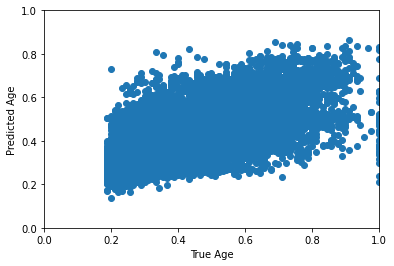

In [14]:
import matplotlib.pyplot as plt

plt.scatter(Y, prediction)
plt.ylabel('Predicted Age')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('True Age')
plt.show()

## Restore predictions (un-normalize)

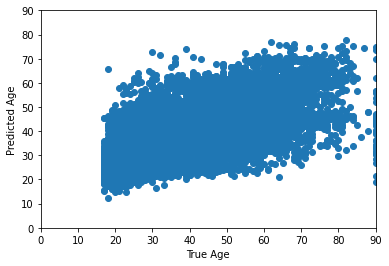

In [15]:
# Obtain the actual ages
Pactual = prediction.flatten() * Ymax
Yactual = Y.flatten() * Ymax

plt.scatter(Yactual, Pactual)
plt.ylabel('Predicted Age')
plt.xlim(0, Ymax)
plt.ylim(0, Ymax)
plt.xlabel('True Age')
plt.show()

# Quantitative evaluation of mode the model using MAE

In [ ]:
diff = abs(Pactual - Yactual)

In [ ]:
print(Yactual[:10])
print(Pactual[:10])
print(diff[:10])

In [ ]:
diff.mean()

In [ ]:
diff.std()

In [ ]:
diff.max()

In [ ]:
diff.min()